<div id="container" style="position:relative;">
<div style="float:left"><h1> Model 1 : Moving Average Baseline Forecast</h1></div>
<div style="position:relative; float:right"><img style="height:65px" src ="https://twomagpiesbakery.co.uk/wp-content/uploads/2020/11/logo-no-site.jpg" />
</div>
</div>

---

**Steps to calculate the baseline model for a daily, weekly and monthly revenue forecast.**

*For each required forecast, 3 different moving average windows will be examined to determine the most accurate.*

- For the daily and weekly forecasts, a 3, 7 and 20 point moving average will be taken, and a 3, 7 and 12 point moving average for the monthly forecasts. These values were chosen as they were deemed the most suitable to capture the seasonal trends experienced in the data. A 12 point moving average is used for the monthly data as there is insufficient datapoints to calculate a 20 point moving average. 

**Evaluation** 
The models will then be evaluated by calculating the:

- R<sup>2</sup> - a statistical measure of fit that indicates how much variation of a daily revenue is explained by the independent variables in the regression model.
- Root Mean Squared Error (RMSE) - RMSE is a measure of how to spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit. This is similar to the MAE score but larger errors are penalised more heavily. 
- Mean Absolute Error (MAE), which calculates the average difference between the predicted values and actual values. 
- Mean Absolute Percentage Error (MAPE) value, which is the percentage of the average absolute values of error between the true revenue values and the predicted ones. 

The moving average model for each forecast with the best accuracy scores will be selected as the baseline model. 

---

# Contents 

**[Executive Summary](#Executive-Summary)**

**[1. Daily Revenue Moving Average Forecast](#Daily-Revenue-Moving-Average-Forecast)**
    
- [Visualising the Daily Moving Averages](#Visualising-the-Daily-Moving-Averages)

- [Predicting the Daily Revenue](#Predicting-the-Daily-Revenue)

- [Evaluating the Accuracy of Daily Moving Average Predictions](#Evaluating-the-Accuracy-of-Daily-Moving-Average-Predictions)
- [Daily Models Summary](#Daily-Models-Summary)

      
**[2. Weekly Revenue Moving Average Forecast](#Weekly-Revenue-Moving-Average-Forecast)**
    
- [Visualising the Weekly Moving Averages](#Visualising-the-Weekly-Moving-Averages)

- [Predicting the Weekly Revenue](#Predicting-the-Weekly-Revenue)

- [Evaluating the Accuracy of Weekly Moving Average Predictions](#Evaluating-the-Accuracy-of-Weekly-Moving-Average-Predictions)
- [Weekly Models Summary](#Weekly-Models-Summary)
      

**[3. Monthly Revenue Moving Average Forecast](#Monthly-Revenue-Moving-Average-Forecast)**
    
- [Visualising the Monthly Moving Averages](#Visualising-the-Monthly-Moving-Averages)

- [Predicting the Monthly Revenue](#Predicting-the-Monthly-Revenue)

- [Evaluating the Accuracy of Monthly Moving Average Predictions](#Evaluating-the-Accuracy-of-Monthly-Moving-Average-Predictions)
- [Monthly Models Summary](#Monthly-Models-Summary)

      
    
**[Summary](#Summary)**

**[Next Steps](#Next-Steps)**
___

# Executive Summary

---

## Importing Libraries

In [66]:
# Main libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go
import os

from plotly.subplots import make_subplots
from pandas.tseries.offsets import DateOffset

## Importing Custom Functions

In [2]:
import BakeryFunctions as bakery

## To Get Current Directory

In [3]:
working_directory = os.getcwd()
working_directory

'/Users/abimagnall/Documents/BrainStation/Capstone/Data'

## Importing Preprocessed Dataset

In [4]:
# Importing the dataset
total_rev = pd.read_csv(working_directory+'/5_timeseries_data/total_revenue.csv', index_col=0)

# Converting the index to a datetime index 
total_rev.index = pd.to_datetime(total_rev.index)

# To validate it imported correctly 
display(total_rev.head())

,Total_Revenue,Day,TAVG,PRCP,CPI_Electricity,CPI_Food
2020-09-01,9780.76,Weekday,24.0,0.00,107.6,102.8
2020-09-02,10037.55,Weekday,27.0,0.00,107.6,102.8
2020-09-03,9419.30,Weekday,31.0,0.07,107.6,102.8
2020-09-04,10606.15,Weekday,27.0,0.08,107.6,102.8
2020-09-05,12922.00,Weekend,23.0,0.01,107.6,102.8


*First a copy of the dataset is taken containing only the date index and the `Total_Revenue` column.*

In [5]:
# Copy of the raw data is taken for audit trail purposes
ma_rev = total_rev.copy()
# Redundant columns are dropped 
ma_rev.drop(columns=['Day','TAVG', 'PRCP','CPI_Electricity','CPI_Food'], inplace=True)
# To validate they dropped 
ma_rev.head()

,Total_Revenue
2020-09-01,9780.76
2020-09-02,10037.55
2020-09-03,9419.30
2020-09-04,10606.15
2020-09-05,12922.00


# 1. Daily Revenue Moving Average Forecast
As the imported data is already sampled at a daily level it does not need to be resampled. 

## Visualising the Daily Moving Averages
New columns for the 3, 7 and 20 day moving average will be calculated using the `rev_moving_average` function. This function utilises the `.rolling()` function on the dataframe. The rolling function allows the rolling window to be set, which then can have the `.mean()` applied to calculate the average, which is added into a new column. 

First the data is split into train and test sets as determined by the business, which is to predict the next 7 days of revenue.

*Therefore, anything before the date 24-09-2022 is the train dataset and on or post is test dataset.*

In [6]:
# Splitting the train and test data
train_daily = ma_rev.loc[ma_rev.index <= '2022-09-23'].copy()
test_daily = ma_rev.loc[ma_rev.index > '2022-09-23'].copy()

In [7]:
# Copy of the dataset is taken for audit trail purposes 
daily_moving_average = ma_rev.copy()

In [8]:
# To show 
bakery.rev_moving_average(daily_moving_average, 3, '3D_MA')
bakery.rev_moving_average(daily_moving_average, 7, '7D_MA')
bakery.rev_moving_average(daily_moving_average, 20, '20D_MA')

In [9]:
# To validate it added correctly 
daily_moving_average

,Total_Revenue,3D_MA,7D_MA,20D_MA
2020-09-01,9780.76,NaN,NaN,NaN
2020-09-02,10037.55,NaN,NaN,NaN
2020-09-03,9419.30,NaN,NaN,NaN
2020-09-04,10606.15,9745.87,NaN,NaN
2020-09-05,12922.00,10021.00,NaN,NaN
...,...,...,...,...
2022-09-26,9932.92,14259.59,12066.51,11952.71
2022-09-27,9718.01,13767.16,11667.77,11928.42
2022-09-28,8069.91,11276.49,11682.47,11945.92
2022-09-29,7877.02,9240.28,11390.86,11892.21


***N.B.*** *It can be seen that the first rows of data for each new moving average columns have null values for the number of rows the length of the rolling window, this is because it is not possible to calculate a n-day moving average on them as they do not have n previous data points.*

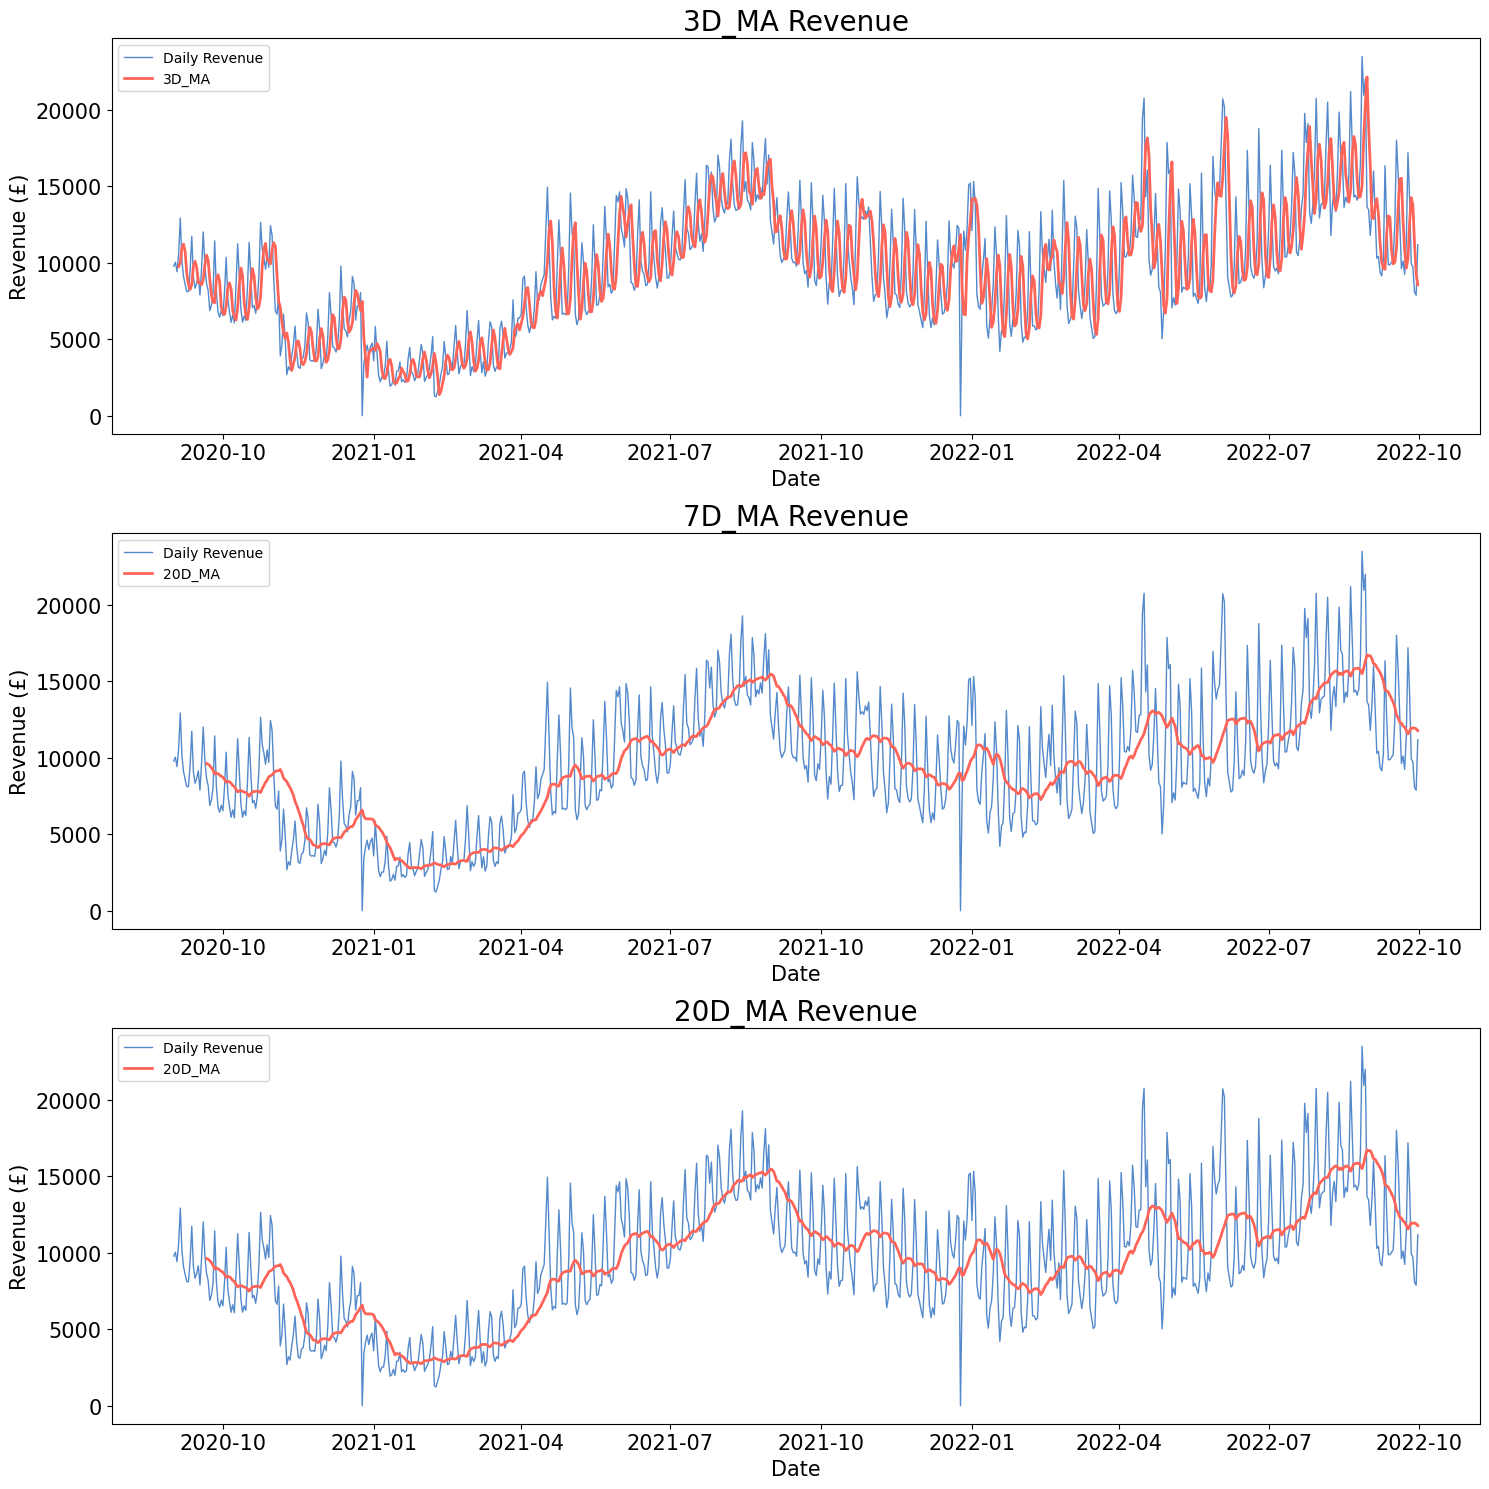

In [10]:
# To plot the moving averages
bakery.moving_average_subplot(daily_moving_average, '3D_MA', '7D_MA', '20D_MA', 'Daily Revenue')

---

## Predicting the Daily Revenue
For the daily predictions, a forecast of 7 days is required. This is calculated using the `predict_rev_ma` function. This function determined the date index that needs forecasting from using the prediction_length. It then calculates the moving average forecast based on previous `Total_Revenue` values or the new predicted values. 

*A copy of the original dataset is taken for audit trail purposes.*

In [11]:
# A copy of the dataset is taken 
daily_prediction = daily_moving_average.copy()

In [12]:
# The predict_rev_ma function is called to make 3, 7 and 20 day moving averages, storing the results in a new column
bakery.predict_rev_ma(daily_prediction, 3, 7, '3D_MA_Prediction', 'Day')
bakery.predict_rev_ma(daily_prediction, 7, 7, '7D_MA_Prediction', 'Day')
bakery.predict_rev_ma(daily_prediction, 20, 7, '20D_MA_Prediction', 'Day')

In [13]:
# To validate it added correctly 
daily_prediction.tail(7)

,Total_Revenue,3D_MA,7D_MA,20D_MA,3D_MA_Prediction,7D_MA_Prediction,20D_MA_Prediction
2022-09-24,17190.04,10252.60,12420.09,11556.70,10252.60,12420.09,11556.70
2022-09-25,14178.53,12612.22,12302.89,11758.29,10299.74,11621.47,11476.63
2022-09-26,9932.92,14259.59,12066.51,11952.71,10654.18,11019.80,11535.95
2022-09-27,9718.01,13767.16,11667.77,11928.42,10402.17,10776.32,11591.81
2022-09-28,8069.91,11276.49,11682.47,11945.92,10452.03,10942.21,11703.00
2022-09-29,7877.02,9240.28,11390.86,11892.21,10502.79,11060.93,11830.94
2022-09-30,11183.32,8554.98,11196.66,11775.34,10452.33,11321.57,11911.77


In [14]:
# A copy of the forecasted slice of the dataset is taken 
daily_forecast = daily_prediction['2022-09-24':].copy()
daily_forecast

,Total_Revenue,3D_MA,7D_MA,20D_MA,3D_MA_Prediction,7D_MA_Prediction,20D_MA_Prediction
2022-09-24,17190.04,10252.60,12420.09,11556.70,10252.60,12420.09,11556.70
2022-09-25,14178.53,12612.22,12302.89,11758.29,10299.74,11621.47,11476.63
2022-09-26,9932.92,14259.59,12066.51,11952.71,10654.18,11019.80,11535.95
2022-09-27,9718.01,13767.16,11667.77,11928.42,10402.17,10776.32,11591.81
2022-09-28,8069.91,11276.49,11682.47,11945.92,10452.03,10942.21,11703.00
2022-09-29,7877.02,9240.28,11390.86,11892.21,10502.79,11060.93,11830.94
2022-09-30,11183.32,8554.98,11196.66,11775.34,10452.33,11321.57,11911.77


In [93]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=daily_prediction.index, y=daily_prediction['Total_Revenue'], mode='lines',
                         name='Daily Revenue', line={'color':bakery.light_magpie}))
fig.add_trace(go.Scatter(x=daily_forecast.index, y=daily_forecast['3D_MA_Prediction'], mode='lines', 
                         name='3D MA Prediction',
                         line={'dash': 'dash', 'color': bakery.dark_magpie}))
fig.add_trace(go.Scatter(x=daily_forecast.index, y=daily_forecast['7D_MA_Prediction'], mode='lines', 
                         name='7D MA Prediction',
                         line={'dash': 'dash', 'color': bakery.red_magpie}))
fig.add_trace(go.Scatter(x=daily_forecast.index, y=daily_forecast['20D_MA_Prediction'], 
                         mode='lines', name='20D MA Prediction',
                         line={'dash': 'dash', 'color':'mediumslateblue' }))

fig.update_layout(
    yaxis_title='Revenue (£)', 
    xaxis_title='Date',
    legend_title='', 
    title='Actual Daily Revenue Against a 3, 7 and 20 Day Moving Average'
#, plot_bgcolor='rgba(0,0,0,0)'
)
# fig.write_image('monthmablank.png', scale=2)
fig.update_xaxes(rangeslider_visible=True)
fig.show()

---

## Evaluating the Accuracy of Daily Moving Average Predictions
The accuracy will be determined by looking at the difference between the predicted and actual value for each point and then the mean of the difference will be taken as the model accuracy (the MAPE score). 

The model with the lowest MAPE score will be deemed the most accuracte moving-average window for forecasting daily revenue, and will be used as the baseline model. 

First the difference between the actual and predicted values will be calculated and visualised. 

In [16]:
# To calculate the difference between the actual and forecasted amount 
bakery.revenue_difference(daily_forecast, '3D_MA_Prediction', '3D_Difference')
bakery.revenue_difference(daily_forecast, '7D_MA_Prediction', '7D_Difference')
bakery.revenue_difference(daily_forecast, '20D_MA_Prediction', '20D_Difference')

In [17]:
# To validate it worked
daily_forecast.head()

,Total_Revenue,3D_MA,7D_MA,20D_MA,3D_MA_Prediction,7D_MA_Prediction,20D_MA_Prediction,3D_Difference,7D_Difference,20D_Difference
2022-09-24,17190.04,10252.60,12420.09,11556.70,10252.60,12420.09,11556.70,6937.44,4769.95,5633.34
2022-09-25,14178.53,12612.22,12302.89,11758.29,10299.74,11621.47,11476.63,3878.79,2557.06,2701.90
2022-09-26,9932.92,14259.59,12066.51,11952.71,10654.18,11019.80,11535.95,-721.26,-1086.88,-1603.03
2022-09-27,9718.01,13767.16,11667.77,11928.42,10402.17,10776.32,11591.81,-684.16,-1058.31,-1873.80
2022-09-28,8069.91,11276.49,11682.47,11945.92,10452.03,10942.21,11703.00,-2382.12,-2872.30,-3633.09


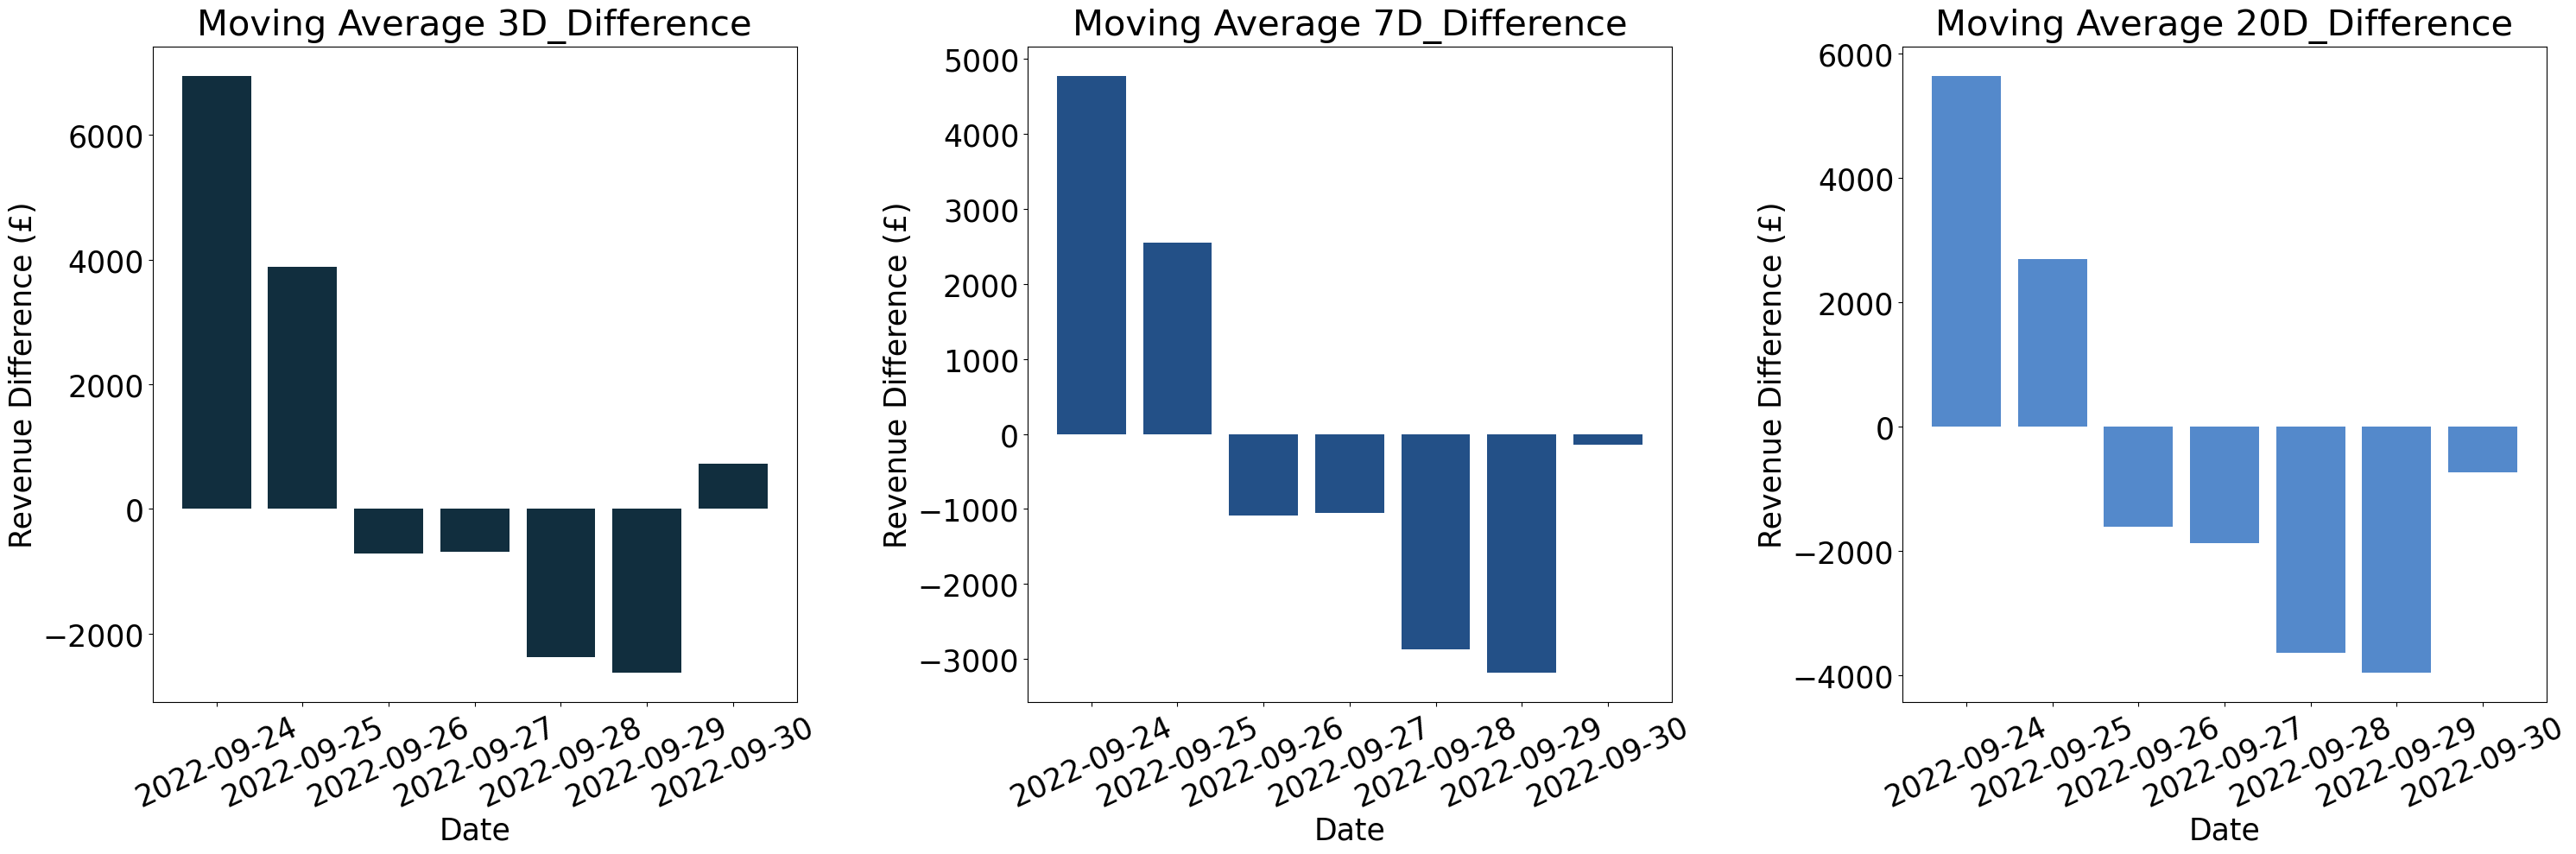

In [18]:
# To plot the differences for the 3 different moving averages that were explored 
bakery.revenue_difference_plots(daily_forecast, '3D_Difference', '7D_Difference', '20D_Difference')

**Observations**: All three moving average forecasts have a similar shape error for the predicted values. The 7 day moving average appears to have a lower difference in the positive direction, but slightly greater in the negative direction. The 20 day moving average can be seen to have the greatest error. 

The MAE and MAPE value will be calculated to provide a quantitative value for the accuracy of each forecast, using the `mean_absolute_error` and `mean_absolute_percentage_error` functions. 

In [21]:
bakery.full_accuracy_report(daily_forecast['Total_Revenue'], daily_forecast['3D_MA_Prediction'], 
                            '3 Day Moving Average')

The R2 for the 3 Day Moving Average is: -0.114

The RMSE for the 3 Day Moving Average is: 3322.32

The MAE between the actual and 3 Day Moving Average revenue is 2565.79

The MAPE between the actual and 3 Day Moving Average revenue is 21.6%


In [22]:
bakery.full_accuracy_report(daily_forecast['Total_Revenue'], daily_forecast['7D_MA_Prediction'], 
                            '7 Day Moving Average')

The R2 for the 7 Day Moving Average is: 0.279

The RMSE for the 7 Day Moving Average is: 2672.58

The MAE between the actual and 7 Day Moving Average revenue is 2238.09

The MAPE between the actual and 7 Day Moving Average revenue is 20.7%


In [23]:
bakery.full_accuracy_report(daily_forecast['Total_Revenue'], daily_forecast['20D_MA_Prediction'], 
                            '20 Day Moving Average')

The R2 for the 20 Day Moving Average is: -0.073

The RMSE for the 20 Day Moving Average is: 3261.88

The MAE between the actual and 20 Day Moving Average revenue is 2875.36

The MAPE between the actual and 20 Day Moving Average revenue is 27.0%


# Daily Models Summary 
The accuracy scores for each moving average model are summarised in the table below: 

|Moving Average Window| R<sup>2</sup> | RMSE | MAE | MAPE |
|:--| :- | :- | :- | :-| 
|3 Days|-0.114| 3,322.32| 2,565.79 | 21.6 %| 
|7 Days |0.279| 2,672.58| 2,238.09| 20.7 %|
|20 Days | -0.073|3,261.88|2,875.36 |27.0 % |


From the above results, it can be seen that the 7 day moving average forecast has the lowest RMSE, MAE and MAPE scores as well as the only model with a positive R<sup>2</sup> value. Therefore, the 7 day moving average is the most accurate at predicting the daily revenue and will be the baseline model for the daily revenue forecast. 

---

# 2. Weekly Revenue Moving Average Forecast
As the original data is at a daily level it needs to be resampled to weekly. This is done using the `.resample()` method. 

*First a copy of the original data is taken for audit trail purposes.*

In [24]:
# A copy of the dataset is taken
weekly_rev = ma_rev.copy()

# The dataset is resampled to be weekly
weekly_rev = weekly_rev.resample('W').sum().round(2)
weekly_rev.head()

,Total_Revenue
2020-09-06,62891.56
2020-09-13,64159.55
2020-09-20,65532.19
2020-09-27,58612.25
2020-10-04,52732.89


## Visualising the Weekly Moving Averages
The new columns for the 3, 7 and 20 point moving average will be calculated using the `rev_moving_average` function.

First the data is split into train and test sets as determined by the business, which is to predict the next 6 weeks of revenue. 

*Therefore, anything before the date 19-08-2022 is train and post is test data.*

In [25]:
# To calculate the moving average for 3, 7 and 20 weeks 
bakery.rev_moving_average(weekly_rev, 3, '3W_MA')
bakery.rev_moving_average(weekly_rev, 7, '7W_MA')
bakery.rev_moving_average(weekly_rev, 20, '20W_MA')

In [45]:
# To validate it worked 
weekly_rev.head()

,Total_Revenue,3W_MA,7W_MA,20W_MA
2020-09-06,62891.56,NaN,NaN,NaN
2020-09-13,64159.55,NaN,NaN,NaN
2020-09-20,65532.19,NaN,NaN,NaN
2020-09-27,58612.25,64194.43,NaN,NaN
2020-10-04,52732.89,62768.00,NaN,NaN


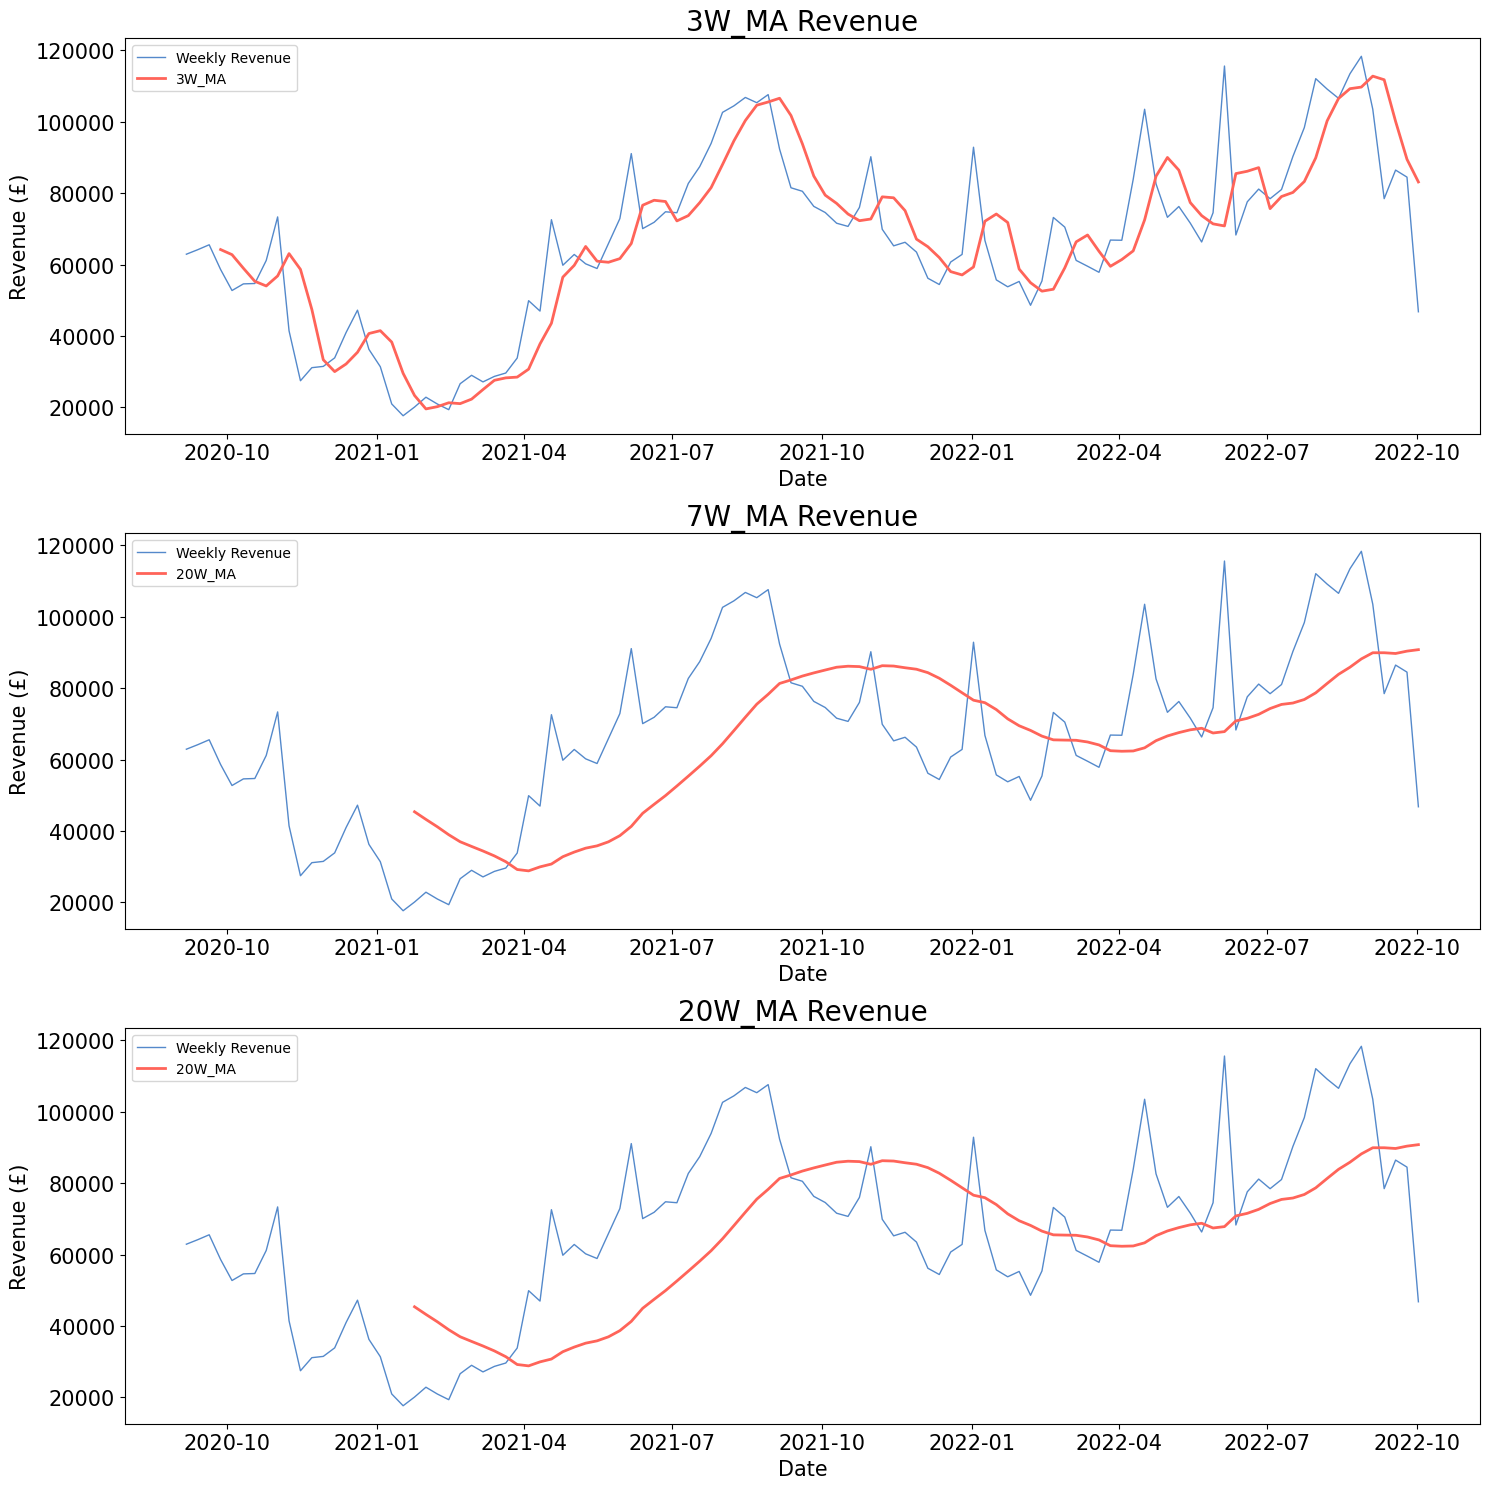

In [27]:
# To plots the moving averages 
bakery.moving_average_subplot(weekly_rev, '3W_MA', '7W_MA', '20W_MA', 'Weekly Revenue')

## Predicting the Weekly Revenue
For the weekly predictions, a forecast of 6 weeks is required. This is calculated using the `predict_rev_ma` function. 

*A copy of the original dataset is taken for audit trail purposes.*

In [28]:
weekly_prediction = weekly_rev.copy()

In [29]:
# predict_rev_ma function used to predict the next 6 weeks of data 
bakery.predict_rev_ma(weekly_prediction, 3, 6, '3W_MA_Prediction', 'Week')
bakery.predict_rev_ma(weekly_prediction, 7, 6, '7W_MA_Prediction', 'Week')
bakery.predict_rev_ma(weekly_prediction, 20, 6, '20W_MA_Prediction', 'Week')

In [30]:
# To validate it worked 
weekly_prediction.tail(6)

,Total_Revenue,3W_MA,7W_MA,20W_MA,3W_MA_Prediction,7W_MA_Prediction,20W_MA_Prediction
2022-08-28,118277.59,109668.14,101516.06,88165.74,109668.14,101516.06,88165.74
2022-09-04,103478.40,112727.74,106842.18,89886.91,109857.92,104447.68,88381.31
2022-09-11,78442.65,111714.48,108730.56,89887.88,110971.17,106474.52,87627.43
2022-09-18,86436.14,100066.21,105889.22,89681.09,110165.74,107637.74,87879.88
2022-09-25,84465.60,89452.40,102234.17,90341.89,110331.61,107011.49,88612.87
2022-10-02,46781.18,83114.80,98715.14,90752.88,110489.51,106713.30,89231.22


In [31]:
# Slices of the dataset are taken for plotting purposes 
df_for_plt = weekly_prediction[(len(weekly_prediction)-25):len(weekly_prediction)-5].copy()
weekly_forecast = weekly_prediction[len(weekly_prediction)-6:].copy()

In [90]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=weekly_prediction.index, y=weekly_prediction['Total_Revenue'], mode='lines',
                         name='Weekly Revenue', line={'color':bakery.light_magpie}))
fig.add_trace(go.Scatter(x=weekly_forecast.index, y=weekly_forecast['3W_MA_Prediction'], mode='lines', 
                         name='3W MA Prediction',
                         line={'dash': 'dash', 'color': bakery.dark_magpie}))
fig.add_trace(go.Scatter(x=weekly_forecast.index, y=weekly_forecast['7W_MA_Prediction'], mode='lines', 
                         name='7W MA Prediction',
                         line={'dash': 'dash', 'color': 'mediumslateblue'}))
fig.add_trace(go.Scatter(x=weekly_forecast.index, y=weekly_forecast['20W_MA_Prediction'], 
                         mode='lines', name='20W MA Prediction',
                         line={'dash': 'dash', 'color': bakery.red_magpie}))

fig.update_layout(
    yaxis_title='Revenue (£)', 
    xaxis_title='Date',
    legend_title="", 
    title='Actual Weekly Revenue Against a 3, 7 and 20 Week Moving Average'
#, plot_bgcolor='rgba(0,0,0,0)'
)
# fig.write_image('monthmablank.png', scale=2)
fig.update_xaxes(rangeslider_visible=True)
fig.show()

## Evaluating the Accuracy of Weekly Moving Average Predictions
First the difference between the actual and predicted values will be calculated and visualised. 

In [38]:
# To calculate the error values between the actual and predicted forecasts 
bakery.revenue_difference(weekly_forecast, '3W_MA_Prediction', '3W_Difference')
bakery.revenue_difference(weekly_forecast, '7W_MA_Prediction', '7W_Difference')
bakery.revenue_difference(weekly_forecast, '20W_MA_Prediction', '20W_Difference')

In [39]:
# To validate it worked 
weekly_forecast.head()

,Total_Revenue,3W_MA,7W_MA,20W_MA,3W_MA_Prediction,7W_MA_Prediction,20W_MA_Prediction,3W_Difference,7W_Difference,20W_Difference
2022-08-28,118277.59,109668.14,101516.06,88165.74,109668.14,101516.06,88165.74,8609.45,16761.53,30111.85
2022-09-04,103478.40,112727.74,106842.18,89886.91,109857.92,104447.68,88381.31,-6379.52,-969.28,15097.09
2022-09-11,78442.65,111714.48,108730.56,89887.88,110971.17,106474.52,87627.43,-32528.52,-28031.87,-9184.78
2022-09-18,86436.14,100066.21,105889.22,89681.09,110165.74,107637.74,87879.88,-23729.60,-21201.60,-1443.74
2022-09-25,84465.60,89452.40,102234.17,90341.89,110331.61,107011.49,88612.87,-25866.01,-22545.89,-4147.27


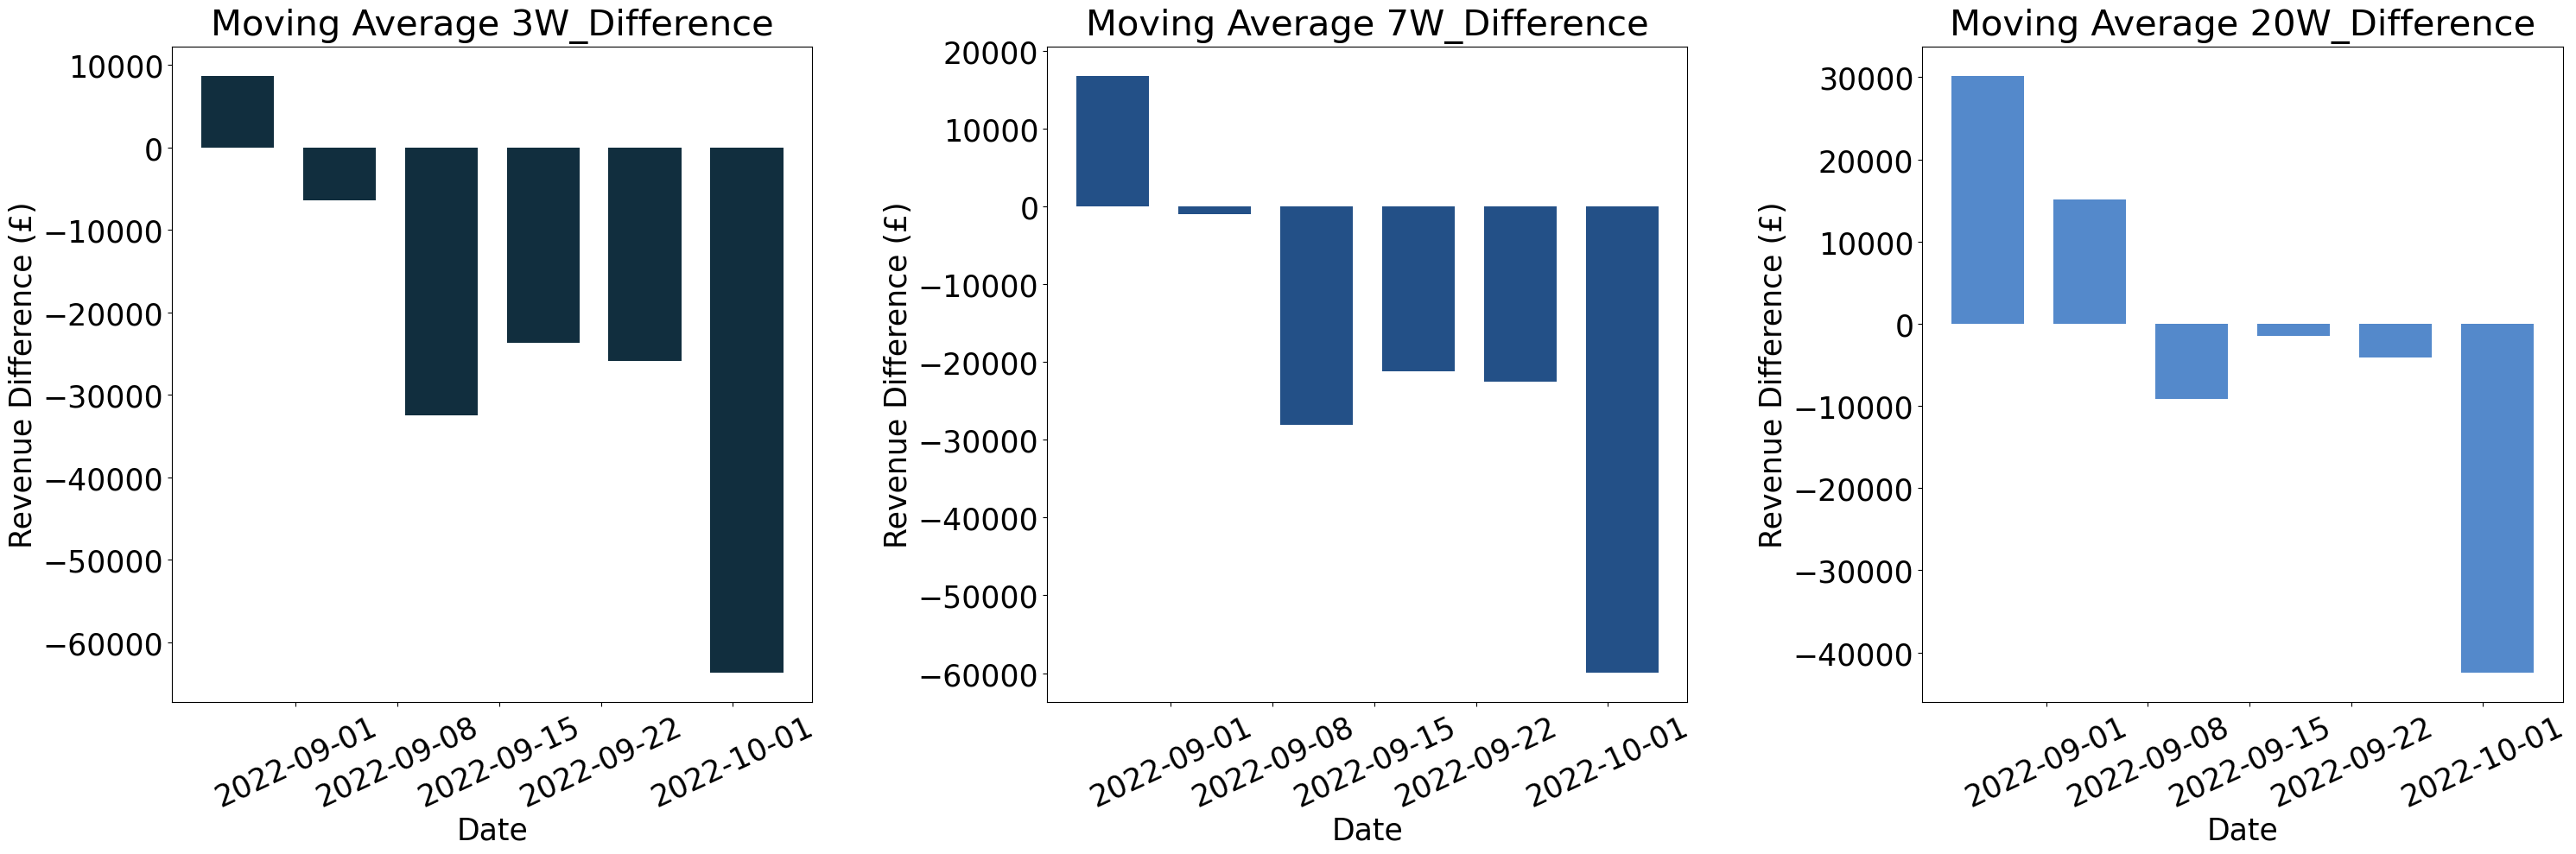

In [40]:
# To plot the errors for each moving average forecast 
bakery.revenue_difference_plots(weekly_forecast, '3W_Difference', '7W_Difference', '20W_Difference', 5)

**Observations**: The 3 and 7 week moving average appear to have simialr error values. The 20 week difference follows a different pattern and appears to have lower error amounts. 

The MAE and MAPE values will be calculated to provide a quantitative value for the accuracy of each forecast, using the `mean_absolute_error` and `mean_absolute_percentage_error` functions. 

In [44]:
# To calcualte the accuracy for the 3 week moving average
bakery.full_accuracy_report(weekly_forecast['Total_Revenue'], weekly_forecast['3W_MA_Prediction'], 
                            '3 Week Moving Average')

The R2 for the 3 Week Moving Average is: -1.195

The RMSE for the 3 Week Moving Average is: 32822.3

The MAE between the actual and 3 Week Moving Average revenue is 26803.57

The MAPE between the actual and 3 Week Moving Average revenue is 41.5%


In [42]:
# To calcualte the accuracy for the 7 week moving average
bakery.full_accuracy_report(weekly_forecast['Total_Revenue'], weekly_forecast['7W_MA_Prediction'], 
                            '7 Week Moving Average')

The R2 for the 7 Week Moving Average is: -0.908

The RMSE for the 7 Week Moving Average is: 30597.82

The MAE between the actual and 7 Week Moving Average revenue is 24907.05

The MAPE between the actual and 7 Week Moving Average revenue is 38.4%


In [43]:
# To calcualte the accuracy for the 20 week moving average
bakery.full_accuracy_report(weekly_forecast['Total_Revenue'], weekly_forecast['20W_MA_Prediction'], 
                            '20 Week Moving Average')

The R2 for the 20 Week Moving Average is: -0.033

The RMSE for the 20 Week Moving Average is: 22510.35

The MAE between the actual and 20 Week Moving Average revenue is 17072.46

The MAPE between the actual and 20 Week Moving Average revenue is 24.8%


# Weekly Models Summary 
The accuracy scores for each moving average model are summarised in the table below: 

|Moving Average Window| R<sup>2</sup> | RMSE | MAE | MAPE |
|:--| :- | :- | :- | :-| 
|3 Weeks|-1.195| 32,822.3| 26,803.57 | 41.5%| 
|7 Weeks |-0.908| 30,597.82| 24,907.05| 38.4%|
|20 Weeks |-0.033|22,510.35|17,072.46 |24.8% |


From the above results, it can be seen that the 20 week moving average forecast has the lowest RMSE, MAE and MAPE scores as well as the model with a R<sup>2</sup> closest to 0. Therefore, the 20 week moving average is the most accurate at predicting the weekly revenue and will be the baseline model for the weekly revenue forecast. 

---

# Monthly Revenue Moving Average Forecast
As the data is at a daily level it needs to be resampled to monthly. This is done using the `.resample('MS)` method. 

In [46]:
# A copy of the original data is taken for audit trail purposes 
monthly_rev = ma_rev.copy()
# The data is resmapled to monthly 
monthly_rev = monthly_rev.resample('MS').sum().round(2)
# To validate it worked
monthly_rev.head()

,Total_Revenue
2020-09-01,271314.93
2020-10-01,267385.25
2020-11-01,143635.13
2020-12-01,173145.73
2021-01-01,95207.98


## Visualising the Monthly Moving Averages
The new columns for the 3, 7 and 12 point moving average will be calculated using the `rev_moving_average` function.

First the data is split into train and test sets as determined by the business, which is to predict the next 6 months of revenue. 

*Therefore, anything before the date 2022-03-01 is train and post is test data.*

In [47]:
# Splitting the train and test data
train_monthly = monthly_rev.loc[monthly_rev.index[:21]].copy()
test_monthly = monthly_rev.loc[monthly_rev.index[21:]].copy()

In [48]:
# The moving average is calculated using the rev_moving_average function 
bakery.rev_moving_average(monthly_rev, 3, '3M_MA')
bakery.rev_moving_average(monthly_rev, 7, '7M_MA')
bakery.rev_moving_average(monthly_rev, 12, '12M_MA')

In [49]:
# To validate it worked
monthly_rev.tail()

,Total_Revenue,3M_MA,7M_MA,12M_MA
2022-05-01,332789.82,293657.17,293879.77,323426.43
2022-06-01,351262.48,321674.77,291882.00,326242.26
2022-07-01,422977.42,349912.14,302217.59,328692.24
2022-08-01,496394.56,369009.91,321867.44,330770.02
2022-09-01,350491.42,423544.82,354913.68,333126.15


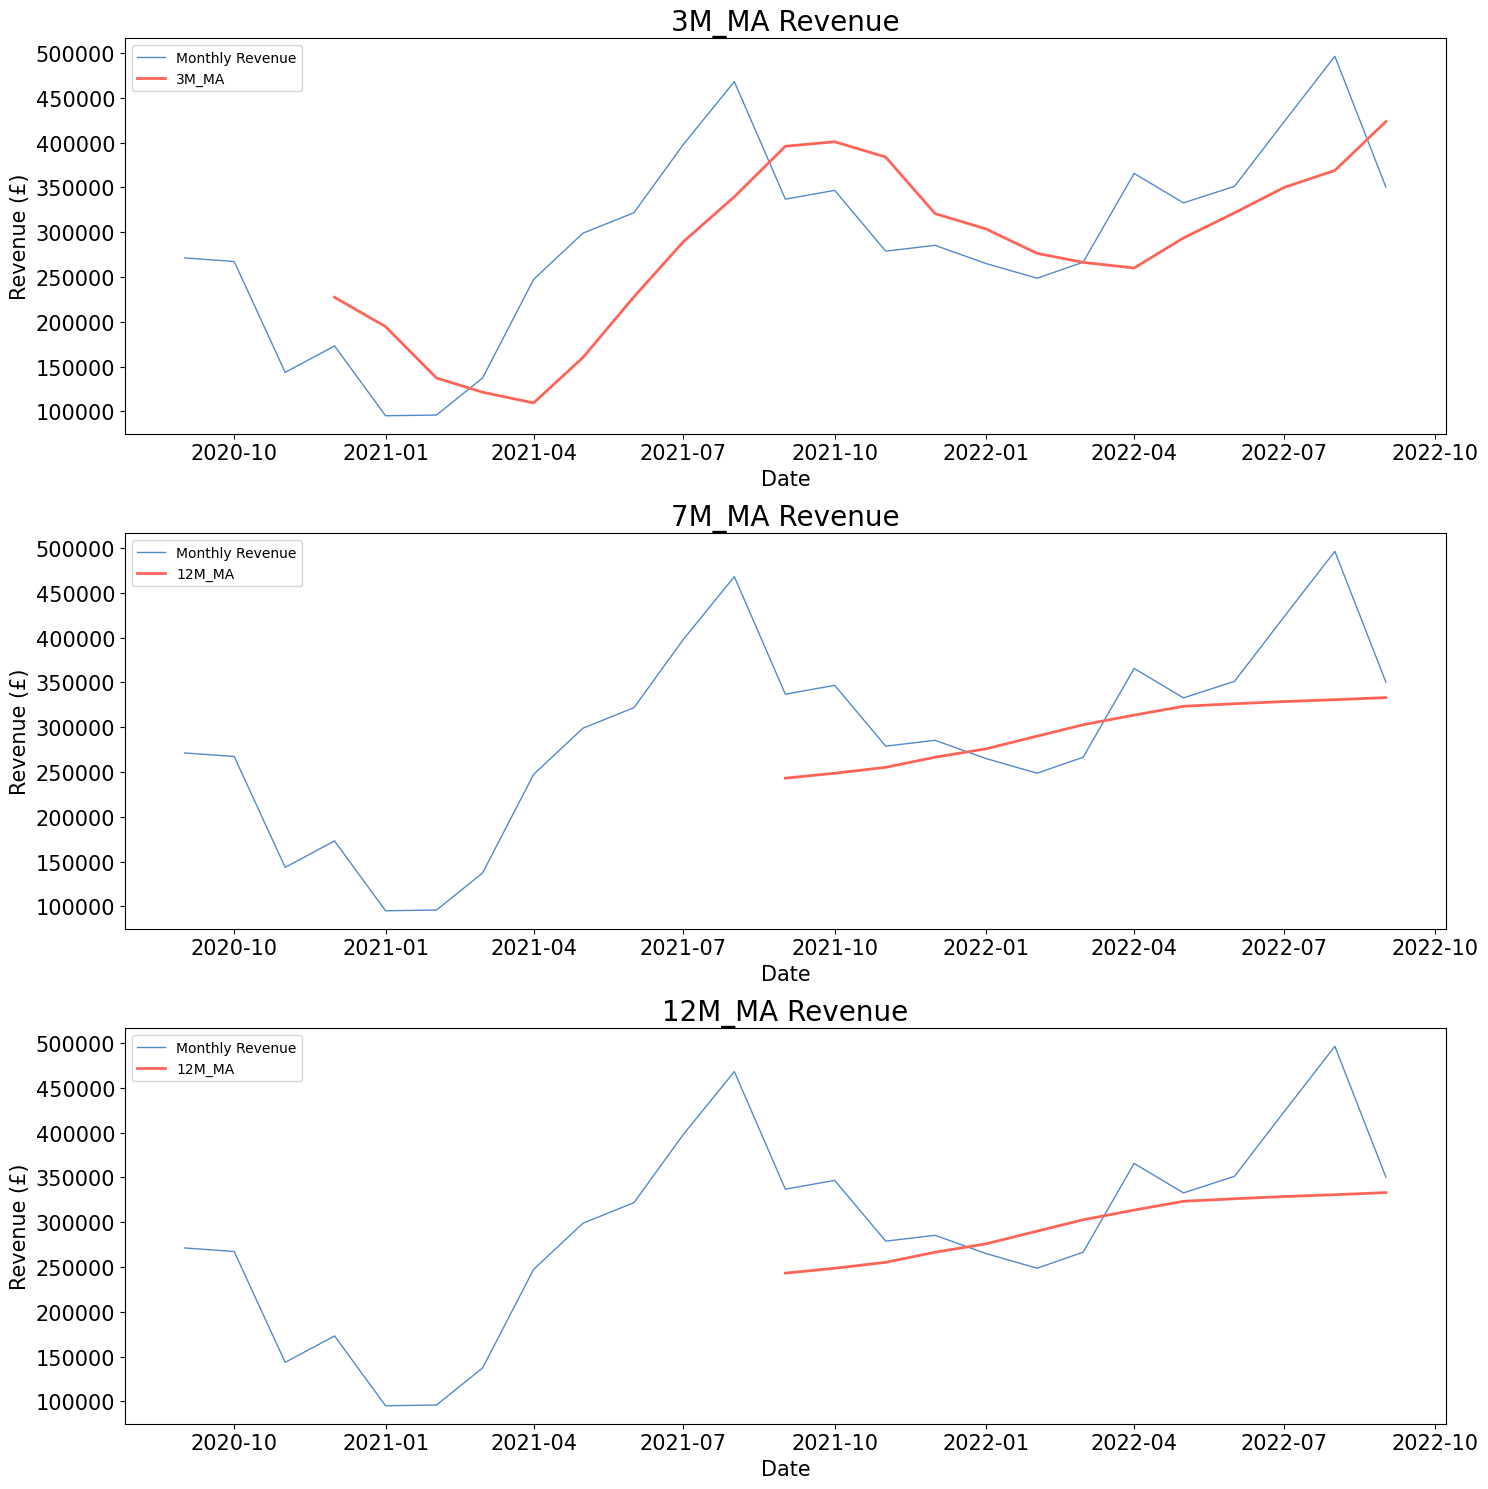

In [50]:
# To plots the moving averages 
bakery.moving_average_subplot(monthly_rev, '3M_MA', '7M_MA', '12M_MA', 'Monthly Revenue')

---

## Predicting the Monthly Revenue
For the monthly predictions, a forecast of 6 months is required. This is calculated using the `predict_rev_ma` function. 

*A copy of the original dataset is taken for audit trail purposes.*

In [51]:
monthly_prediction = monthly_rev.copy()

In [52]:
# The 3, 7 and 12 moving averages are used to predict the next 6 months of revenue 
bakery.predict_rev_ma(monthly_prediction, 3, 6, '3M_MA_Prediction', 'Month')
bakery.predict_rev_ma(monthly_prediction, 7, 6, '7M_MA_Prediction', 'Month')
bakery.predict_rev_ma(monthly_prediction, 12, 6, '12M_MA_Prediction', 'Month')

In [53]:
# To validate it worked
monthly_prediction.tail(6)

,Total_Revenue,3M_MA,7M_MA,12M_MA,3M_MA_Prediction,7M_MA_Prediction,12M_MA_Prediction
2022-04-01,365684.13,260119.41,289772.21,313570.88,260119.41,289772.21,313570.88
2022-05-01,332789.82,293657.17,293879.77,323426.43,258468.93,283035.21,319083.66
2022-06-01,351262.48,321674.77,291882.00,326242.26,261712.90,273929.64,320757.31
2022-07-01,422977.42,349912.14,302217.59,328692.24,260100.41,273217.68,320665.19
2022-08-01,496394.56,369009.91,321867.44,330770.02,260094.08,271473.28,314216.96
2022-09-01,350491.42,423544.82,354913.68,333126.15,260635.80,272387.91,301391.62


In [54]:
# Slices of the dataset are taken for plotting purposes 
monthly_plot = monthly_prediction[:len(monthly_prediction)-5].copy()
monthly_forecast = monthly_prediction[len(monthly_prediction)-6:].copy()

In [91]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=monthly_prediction.index, y=monthly_prediction['Total_Revenue'], mode='lines',
                         name='Monthly Revenue', line={'color':bakery.light_magpie}))
fig.add_trace(go.Scatter(x=monthly_forecast.index, y=monthly_forecast['3M_MA_Prediction'], mode='lines', name='3M MA Prediction',
                         line={'dash': 'dash', 'color': bakery.dark_magpie}))
fig.add_trace(go.Scatter(x=monthly_forecast.index, y=monthly_forecast['7M_MA_Prediction'], mode='lines', name='7M MA Prediction',
                         line={'dash': 'dash', 'color': 'mediumslateblue'}))
fig.add_trace(go.Scatter(x=monthly_forecast.index, y=monthly_forecast['12M_MA_Prediction'], mode='lines', name='12M MA Prediction',
                         line={'dash': 'dash', 'color': bakery.red_magpie}))

fig.update_layout(
    yaxis_title='Revenue (£)', 
    xaxis_title='Date',
    legend_title="", 
    title='Actual Monthly Revenue Against a 3, 7 and 12 Month Moving Average'
#, plot_bgcolor='rgba(0,0,0,0)'
)
# fig.write_image('monthmablank.png', scale=2)
fig.update_xaxes(rangeslider_visible=True)
fig.show()

---

## Evaluating the Accuracy of Monthly Moving Average Predictions
First the difference between the actual and predicted values will be calculated and visualised. 

In [57]:
# To calculate the difference between the predicted and actual revenue 
bakery.revenue_difference(monthly_forecast, '3M_MA_Prediction', '3M_Difference')
bakery.revenue_difference(monthly_forecast, '7M_MA_Prediction', '7M_Difference')
bakery.revenue_difference(monthly_forecast, '12M_MA_Prediction', '12M_Difference')

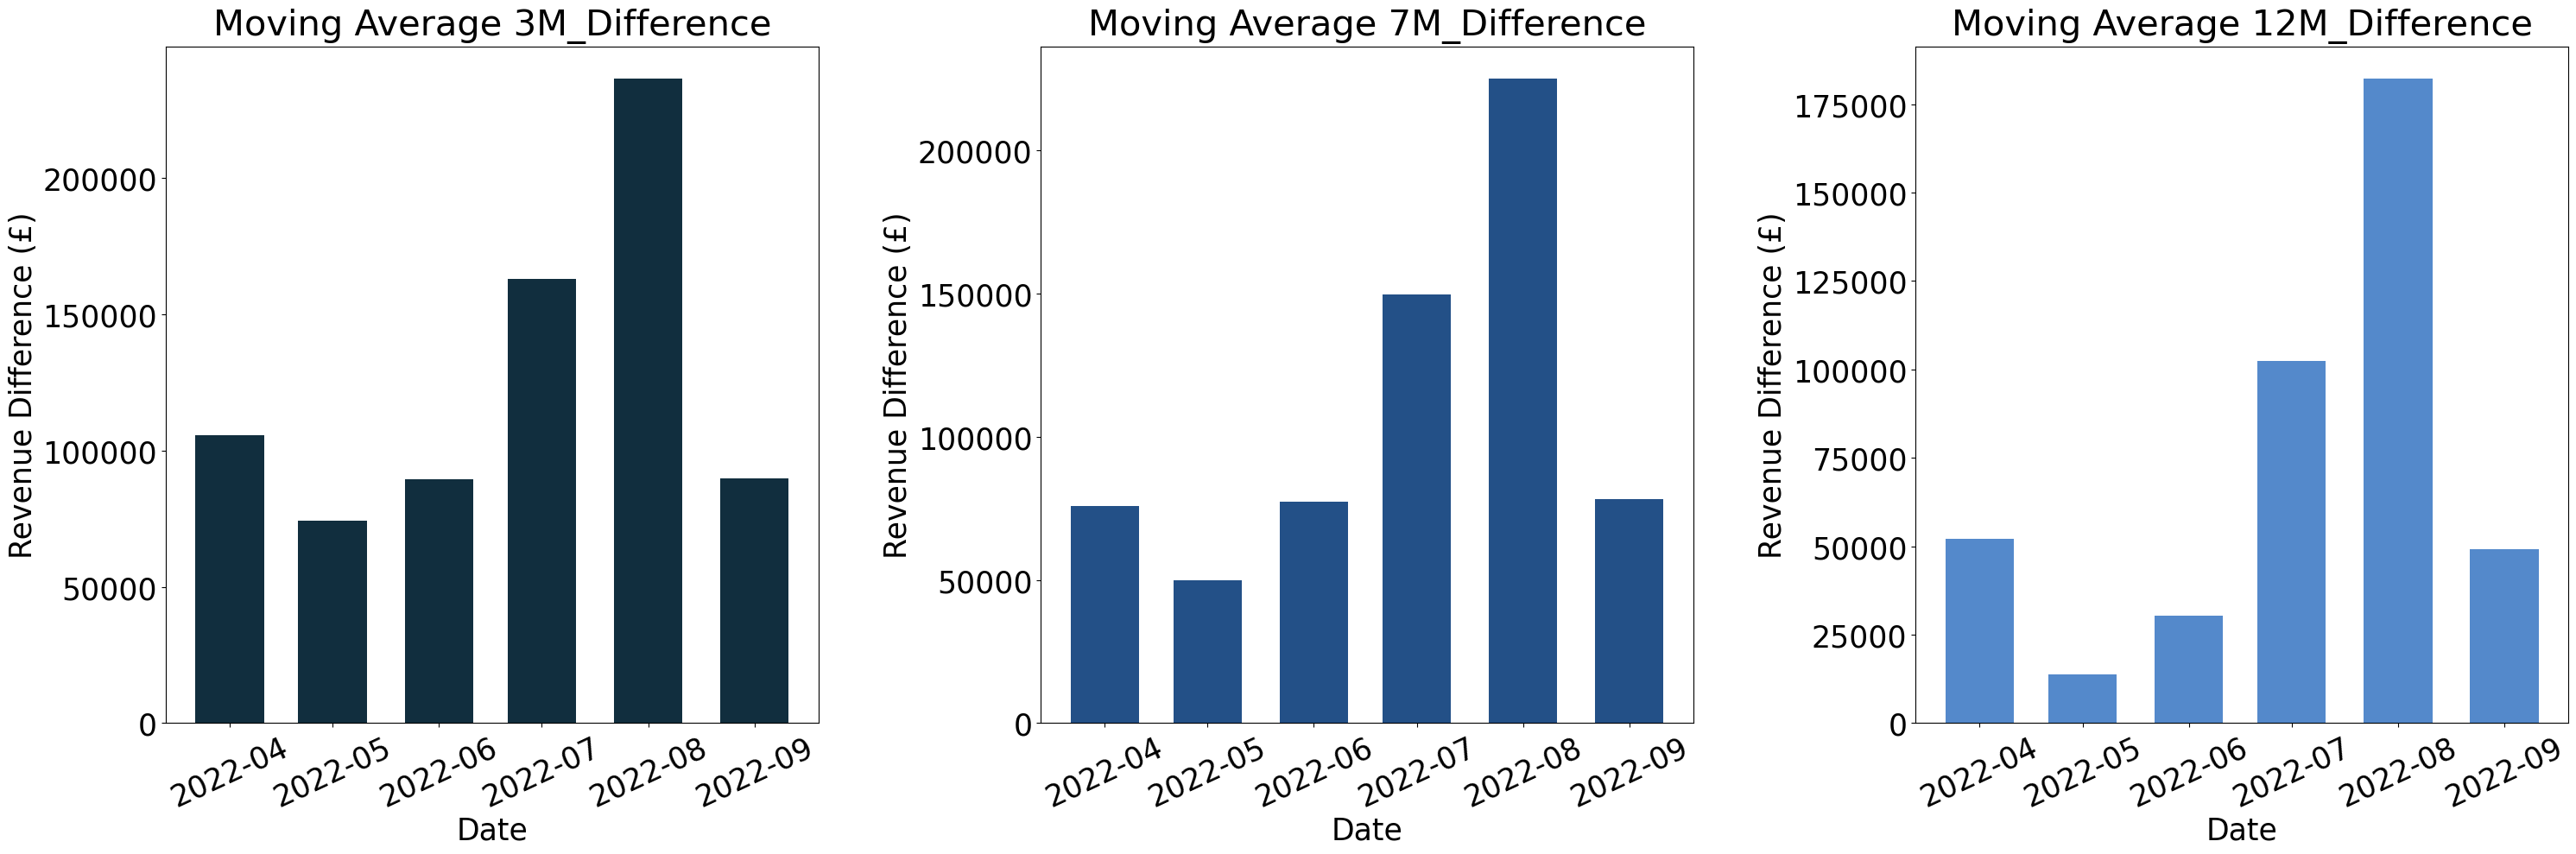

In [58]:
# To plot the error values for each predicted value 
bakery.revenue_difference_plots(monthly_forecast, '3M_Difference', '7M_Difference', '12M_Difference', 20)

In [61]:
# To determine the accuracy of the 3 month moving average model 
bakery.full_accuracy_report(monthly_forecast['Total_Revenue'], monthly_forecast['3M_MA_Prediction'], 
                            '3 Month Moving Average')

The R2 for the 3 Month Moving Average is: -4.976

The RMSE for the 3 Month Moving Average is: 138520.46

The MAE between the actual and 3 Month Moving Average revenue is 126411.38

The MAPE between the actual and 3 Month Moving Average revenue is 31.4%


In [62]:
# To determine the accuracy of the 7 month moving average model 
bakery.full_accuracy_report(monthly_forecast['Total_Revenue'], monthly_forecast['7M_MA_Prediction'], 
                            '7 Month Moving Average')

The R2 for the 7 Month Moving Average is: -3.845

The RMSE for the 7 Month Moving Average is: 124723.85

The MAE between the actual and 7 Month Moving Average revenue is 109297.32

The MAPE between the actual and 7 Month Moving Average revenue is 26.8%


In [64]:
# To determine the accuracy of the 12 month moving average model 
bakery.full_accuracy_report(monthly_forecast['Total_Revenue'], monthly_forecast['12M_MA_Prediction'], 
                            '12 Month Moving Average')

The R2 for the 12 Month Moving Average is: -1.59

The RMSE for the 12 Month Moving Average is: 91197.11

The MAE between the actual and 12 Month Moving Average revenue is 71652.37

The MAPE between the actual and 12 Month Moving Average revenue is 17.0%


# Monthly Models Summary 
The accuracy scores for each moving average model are summarised in the table below: 

|Moving Average Window| R<sup>2</sup> | RMSE | MAE | MAPE |
|:--| :- | :- | :- | :-| 
|3 Months|-4.976| 138,520.46| 126,411.38 | 31.4 %| 
|7 Months |-3.845| 124,723.85| 109,297.32| 26.8 %|
|12 Months | -1.59|91,197.11|71,652.37 |17.0 % |


From the above results, it can be seen that the 12 month moving average forecast has the lowest RMSE, MAE and MAPE scores as well as the model with the R<sup>2</sup> closest to 0. Therefore, the 12 month moving average is the most accurate at predicting the monthly revenue and will be the baseline model for the monthly revenue forecast. 

---

# Summary
The baseline models for each forecast are summarised in the table below, along with their accuracy scores and moving average window length.


| Forecast | R<sup>2</sup> | RMSE | MAE | MAPE |Moving Average Window|
| :- | :- | :- |:- | :- | :- |
|Daily| 0.279| 2,673|2,238|20.7 %|        7|
| Weekly|-0.033|22,510 |17,072|24.8 %| 20|
| Monthly|-1.59|91,197|71,652|17.0 %| 12|

For each of the baseline models they have incredibly high MAE and RMSE scores, which could indicate inaccurate models. However, as the MAE is returned on the same scale as the target it isn't the most reliable score. 

The R<sup>2</sup> score is how close the predicted values fit to the actual revenue, which are all very low or negative values, which means they don't fit that well. This is most likely due to the smoothing affect of the moving averages. 

The MAPE is a far more interpretable metric. The MAPE is the average percentage difference between the forecasted valued and the true revenue values. Both the daily and weekly MAPE score are over 20%, suggesting they are ok models. The reason they are not good is most likely due to the variance for each day and week is not captured well by the moving average. 

Whereas, for the monthly MAPE score is less than 20%, suggesting a better model. This is most likely due to the fact the monthly revenue variance is far less than the daily and weekly, therefore the smoothing effect of the moving average does not make the predictions worse. 

---

# Next Steps
- A linear regression model will be developed to see if this improves the accuracy from the moving average 
- The linear regression model will incldue additional independent variables, including `TAVG`, `PRCP` and `Day` data

>[Return to Contents](#Contents)